# Projet maison n° 5

On s'intéresse au fichier sur la Couverture 2G, 3G, 4G en France par opérateur de juillet 2015 fourni par l'ARCEP : "couverture-2g-3g-4g-en-france-par-operateur-juillet-2015.csv".

[°] Ce fichier donne le taux de couverture par commune, par opérateur (Orange France, Bouygues Telecom, SFR, Free Mobile, Tout Opérateur), par type de couverture (Couverture population, Couverture surfacique) et par réseau (2G, 3G, 4G).

1. Chargez le fichier dans un DataFrame.
2. Transformez ce DataFrame large en un DataFrame long en isolant les colonnes d'identification d'une part et les colonnes de valeurs de couverture d'autre part.
3. Rajoutez 3 colonnes "Opérateur", "Type Couverture" et "Réseau" calculées à partir de la colonne "variable" obtenue en 2 (utilisez les valeurs indiquées entre parenthèses ci-dessus [°], ces valeurs sont utilisées dans les tests).
4. A partir de ce DataFrame, obtenez un objet de type Series dont les valeurs correspondent à la colonne "value" obtenue en 2 et dont le multi-index contient les autres colonnes du DataFrame sauf la colonne "variable" obtenue en 2. Puis remontez les index "Opérateur", "Type Couverture" et "Réseau" en colonnes multi-indexées. Vous devez obtenir un DataFrame avec 7 niveaux d'index et 3 niveaux de colonnes.
5. Chargez le DataFrame des communes déjà utilisé ("correspondance-code-insee-code-postal.csv") et effectuez une jointure sur le code INSEE avec le DataFrame obtenu en 3.
6. Pour le réseau 4G et la couverture surfacique, calculez la moyenne des couvertures par statut de commune et par opérateur. Pour quel couple (statut, opérateur) a-t-on la moyenne de la couverture la plus faible ?

**Nota bene** : les différentes instructions doivent être réalisées dans les fonctions prédéfinies pour passer les tests. Il est néanmoins possible de définir des fonctions annexes appelées par les fonctions prédéfinies.

In [96]:
# import
import pandas as pd

In [97]:
# 1) Chargez le fichier dans un DataFrame
def load_data():
    df =pd.read_csv("couverture-2g-3g-4g-en-france-par-operateur-juillet-2015.csv",header=0,sep=';')
    return df


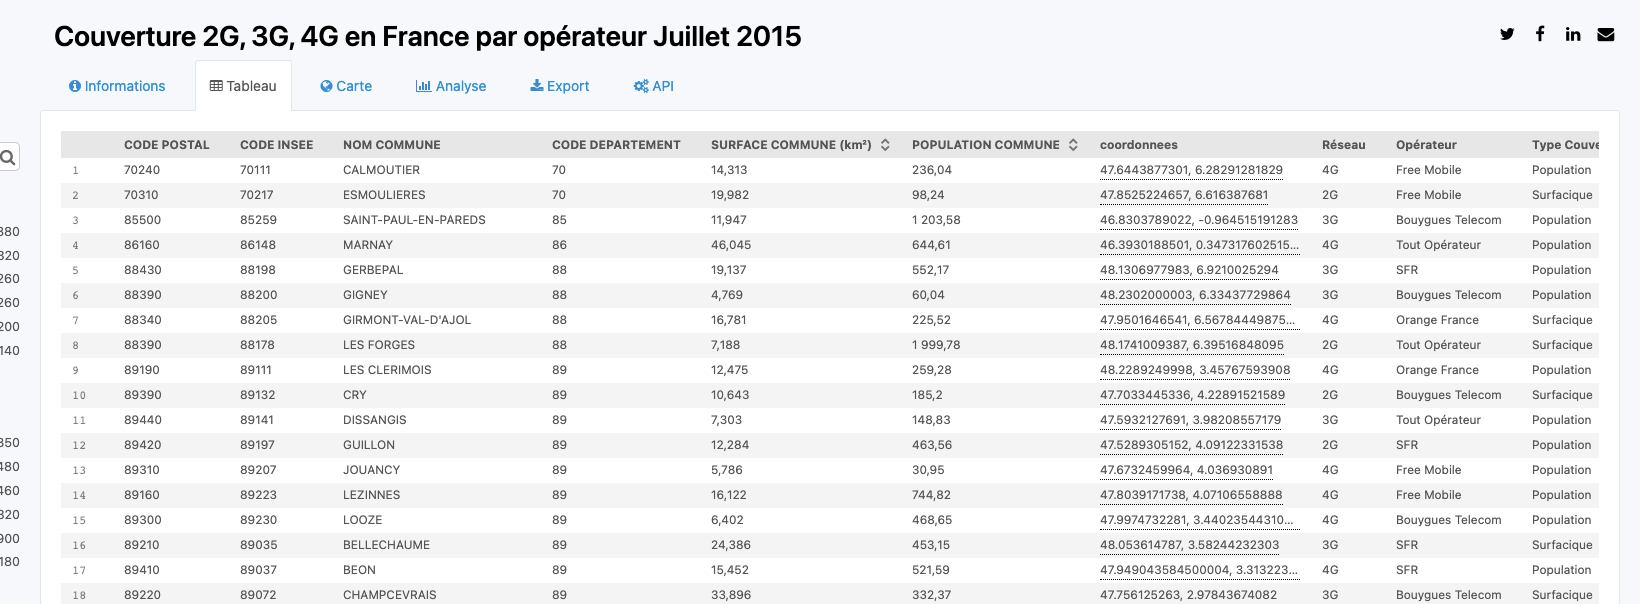

In [98]:
# load_data
df=load_data()


In [102]:
# 2) Transformez ce DataFrame large en un DataFrame long
def data_wide2long():
    df = load_data()
    l = list(df.columns[:6])
    l.append("coordonnees")
    tab = df.melt(id_vars=l)
#attention reoganissation des données necessaire
    return tab

In [103]:
# data_wide2long
data_wide2long()

,CODE POSTAL,CODE INSEE,NOM COMMUNE,CODE DEPARTEMENT,SURFACE COMMUNE (km²),POPULATION COMMUNE,coordonnees,variable,value
0,17510,17105,CHIVES,17,20.642005,355.32,"45.9508835378, -0.121918052323",Orange France Couverture population 4G,0.00
1,17600,17112,LA CLISSE,17,4.896771,591.78,"45.7320429784, -0.75493581331",Orange France Couverture population 4G,0.09
2,17150,17116,CONSAC,17,8.915911,239.74,"45.4182495786, -0.588917528415",Orange France Couverture population 4G,0.00
3,17130,17118,CORIGNAC,17,10.850210,358.69,"45.2448604983, -0.39280322021",Orange France Couverture population 4G,0.00
4,17330,17124,COURANT,17,15.586269,371.00,"46.0375312829, -0.587834905531",Orange France Couverture population 4G,0.00
...,...,...,...,...,...,...,...,...,...
1097815,70000,70378,NAVENNE,70,3.826265,1847.69,"47.6030208472, 6.1618556725",Par au moins un opérateur Couverture surfaciqu...,1.00
1097816,70000,70388,NOIDANS-LES-VESOUL,70,8.634594,2159.19,"47.6097514089, 6.11842989879",Par au moins un opérateur Couverture surfaciqu...,1.00
1097817,70100,70389,NOIRON,70,5.768295,64.01,"47.3828510502, 5.62597938451",Par au moins un opérateur Couverture surfaciqu...,1.00
1097818,70500,70399,ORMOY,70,19.577164,224.76,"47.8850612988, 5.99402771513",Par au moins un opérateur Couverture surfaciqu...,1.00


In [185]:
# 3) Rajoutez 3 colonnes "Opérateur", "Type Couverture" et "Réseau"
def data_add3columns():
    df = data_wide2long()
    df["Opérateur"] = df['variable'].str[:-25]
    df["Opérateur"] = df["Opérateur"].replace("Par au moins un opérateur", "Tout Opérateur")
    df["Type Couverture"] ="Couverture " + df['variable'].str.split().str[-2]
    df["Réseau"] = df['variable'].str.split().str[-1]
    return df

In [186]:
# data_add3columns
data_add3columns()

,CODE POSTAL,CODE INSEE,NOM COMMUNE,CODE DEPARTEMENT,SURFACE COMMUNE (km²),POPULATION COMMUNE,coordonnees,variable,value,Opérateur,Type Couverture,Réseau
0,17510,17105,CHIVES,17,20.642005,355.32,"45.9508835378, -0.121918052323",Orange France Couverture population 4G,0.00,Orange France,Couverture population,4G
1,17600,17112,LA CLISSE,17,4.896771,591.78,"45.7320429784, -0.75493581331",Orange France Couverture population 4G,0.09,Orange France,Couverture population,4G
2,17150,17116,CONSAC,17,8.915911,239.74,"45.4182495786, -0.588917528415",Orange France Couverture population 4G,0.00,Orange France,Couverture population,4G
3,17130,17118,CORIGNAC,17,10.850210,358.69,"45.2448604983, -0.39280322021",Orange France Couverture population 4G,0.00,Orange France,Couverture population,4G
4,17330,17124,COURANT,17,15.586269,371.00,"46.0375312829, -0.587834905531",Orange France Couverture population 4G,0.00,Orange France,Couverture population,4G
...,...,...,...,...,...,...,...,...,...,...,...,...
1097815,70000,70378,NAVENNE,70,3.826265,1847.69,"47.6030208472, 6.1618556725",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,Couverture surfacique,2G
1097816,70000,70388,NOIDANS-LES-VESOUL,70,8.634594,2159.19,"47.6097514089, 6.11842989879",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,Couverture surfacique,2G
1097817,70100,70389,NOIRON,70,5.768295,64.01,"47.3828510502, 5.62597938451",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,Couverture surfacique,2G
1097818,70500,70399,ORMOY,70,19.577164,224.76,"47.8850612988, 5.99402771513",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,Couverture surfacique,2G


In [146]:
# 4) Transformez ce DataFrame en multi-index
def data_multi_index():
    df = data_add3columns()
    df = df.pivot_table(values='value',
                        index=['CODE POSTAL','CODE INSEE','NOM COMMUNE','CODE DEPARTEMENT','SURFACE COMMUNE (km²)','POPULATION COMMUNE','coordonnees'], 
                        columns=['Opérateur','Type Couverture','Réseau'],
                        aggfunc='sum')
    return df

In [147]:
# data_multi_index
data_multi_index()

Opérateur                                                                                                                           Bouygues Telecom  \
Type Couverture                                                                                                                           population   
Réseau                                                                                                                                            2G   
CODE POSTAL CODE INSEE NOM COMMUNE           CODE DEPARTEMENT SURFACE COMMUNE (km²) POPULATION COMMUNE coordonnees                                     
01000       01053      BOURG-EN-BRESSE       01               23.876482             38923.25           46.2051520382, 5.24602125501              1.0   
            01344      SAINT-DENIS-LES-BOURG 01               13.006094             6163.17            46.2111998453, 5.18462806771              1.0   
01090       01165      FRANCHELEINS          01               13.779201             1349.42            46.0735946256, 4.81293575559              1.0   
            01169      GENOUILLEUX           01               3.759855              608.97             46.1201611728, 4.79288195016              1.0   
            01183      GUEREINS              01               4.579867              1308.07            46.106624674, 4.78159420118               1.0   
...                                                                                                                                              ...   
95840       95678      VILLIERS-ADAM         95               10.017297             858.54             49.0702888248, 2.23950871871              1.0   
95850       95316      JAGNY-SOUS-BOIS       95               4.376690              253.80             49.0814278078, 2.44399511411              1.0   
            95365      MAREIL-EN-FRANCE      95               6.976155              694.19             49.0700384798, 2.41753793907              1.0   
95870       95063      BEZONS                95               4.140129              27624.82           48.9259810125, 2.21133387765              1.0   
95880       95210      ENGHIEN-LES-BAINS     95               1.623782              11664.02           48.97016048, 2.30485955429                1.0   

Opérateur                                                                                                                                  \
Type Couverture                                                                                                                             
Réseau                                                                                                                                 3G   
CODE POSTAL CODE INSEE NOM COMMUNE           CODE DEPARTEMENT SURFACE COMMUNE (km²) POPULATION COMMUNE coordonnees                          
01000       01053      BOURG-EN-BRESSE       01               23.876482             38923.25           46.2051520382, 5.24602125501  1.00   
            01344      SAINT-DENIS-LES-BOURG 01               13.006094             6163.17            46.2111998453, 5.18462806771  1.00   
01090       01165      FRANCHELEINS          01               13.779201             1349.42            46.0735946256, 4.81293575559  1.00   
            01169      GENOUILLEUX           01               3.759855              608.97             46.1201611728, 4.79288195016  1.00   
            01183      GUEREINS              01               4.579867              1308.07            46.106624674, 4.78159420118   1.00   
...                                                                                                                                   ...   
95840       95678      VILLIERS-ADAM         95               10.017297             858.54             49.0702888248, 2.23950871871  1.00   
95850       95316      JAGNY-SOUS-BOIS       95               4.376690              253.80             49.0814278078, 2.44399511411  1.00   
            95365      MARE

In [160]:
# 5) Effectuez une jointure sur le code INSEE
def data_join_geo():
    df1 = pd.read_csv('correspondance-code-insee-code-postal.csv', sep=';')
    df1.rename(columns={'Code INSEE': 'CODE INSEE'}, inplace=True)
    df2 = data_add3columns()
    df3 = pd.merge(df2, df1, on='CODE INSEE', how='left')
    return df3

In [162]:
# data_join_geo
data_join_geo()

,CODE POSTAL,CODE INSEE,NOM COMMUNE,CODE DEPARTEMENT,SURFACE COMMUNE (km²),POPULATION COMMUNE,coordonnees,variable,value,Opérateur,...,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région
0,17510,17105,CHIVES,17,20.642005,355.32,"45.9508835378, -0.121918052323",Orange France Couverture population 4G,0.00,Orange France,...,2062.0,0.4,"45.9508835378,-0.121918052323","{""type"": ""Polygon"", ""coordinates"": [[[-0.10484...",22032,105,4,5,17,54
1,17600,17112,LA CLISSE,17,4.896771,591.78,"45.7320429784, -0.75493581331",Orange France Couverture population 4G,0.09,Orange France,...,524.0,0.6,"45.7320429784,-0.75493581331","{""type"": ""Polygon"", ""coordinates"": [[[-0.74528...",26593,112,36,4,17,54
2,17150,17116,CONSAC,17,8.915911,239.74,"45.4182495786, -0.588917528415",Orange France Couverture population 4G,0.00,Orange France,...,905.0,0.2,"45.4182495786,-0.588917528415","{""type"": ""Polygon"", ""coordinates"": [[[-0.60200...",34862,116,16,1,17,54
3,17130,17118,CORIGNAC,17,10.850210,358.69,"45.2448604983, -0.39280322021",Orange France Couverture population 4G,0.00,Orange France,...,1112.0,0.3,"45.2448604983,-0.39280322021","{""type"": ""Polygon"", ""coordinates"": [[[-0.41318...",27409,118,17,1,17,54
4,17330,17124,COURANT,17,15.586269,371.00,"46.0375312829, -0.587834905531",Orange France Couverture population 4G,0.00,Orange France,...,1574.0,0.4,"46.0375312829,-0.587834905531","{""type"": ""Polygon"", ""coordinates"": [[[-0.58528...",20543,124,12,5,17,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097815,70000,70378,NAVENNE,70,3.826265,1847.69,"47.6030208472, 6.1618556725",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,...,400.0,1.8,"47.6030208472,6.1618556725","{""type"": ""Polygon"", ""coordinates"": [[[6.157643...",28039,378,26,2,70,43
1097816,70000,70388,NOIDANS-LES-VESOUL,70,8.634594,2159.19,"47.6097514089, 6.11842989879",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,...,856.0,2.1,"47.6097514089,6.11842989879","{""type"": ""Polygon"", ""coordinates"": [[[6.119037...",30911,388,29,2,70,43
1097817,70100,70389,NOIRON,70,5.768295,64.01,"47.3828510502, 5.62597938451",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,...,575.0,0.1,"47.3828510502,5.62597938451","{""type"": ""Polygon"", ""coordinates"": [[[5.640740...",23970,389,9,2,70,43
1097818,70500,70399,ORMOY,70,19.577164,224.76,"47.8850612988, 5.99402771513",Par au moins un opérateur Couverture surfaciqu...,1.00,Tout Opérateur,...,1962.0,0.2,"47.8850612988,5.99402771513","{""type"": ""Polygon"", ""coordinates"": [[[5.945622...",12025,399,12,2,70,43


In [165]:
df3=data_join_geo()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097820 entries, 0 to 1097819
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CODE POSTAL            1097820 non-null  object 
 1   CODE INSEE             1097820 non-null  object 
 2   NOM COMMUNE            1097820 non-null  object 
 3   CODE DEPARTEMENT       1097820 non-null  object 
 4   SURFACE COMMUNE (km²)  1097820 non-null  float64
 5   POPULATION COMMUNE     1097820 non-null  float64
 6   coordonnees            1097820 non-null  object 
 7   variable               1097820 non-null  object 
 8   value                  1097806 non-null  float64
 9   Opérateur              1097820 non-null  object 
 10  Type Couverture        1097820 non-null  object 
 11  Réseau                 1097820 non-null  object 
 12  Code Postal            1097820 non-null  object 
 13  Commune                1097820 non-null  object 
 14  Département       

In [188]:
# 6) Pour quels statut et opérateur a-t-on la couverture la plus faible ?
def data_get_worst_statut_operateur():
    df = data_join_geo()
    worst_statut_operateur = df[(df['Type Couverture'] == 'Couverture surfacique') &
                            (df['Réseau'] == '4G')].groupby(['Statut','Opérateur']).mean()['value'].idxmin()
    return worst_statut_operateur

In [189]:
# data_get_worst_statut_operateur
data_get_worst_statut_operateur()

('Commune simple', 'Free Mobile')

In [190]:
import unittest

class Lesson5Tests(unittest.TestCase):
    
    def test_01_load_data(self):
        df = load_data()
        # test shape
        self.assertEqual(df.shape, (36594, 37))
        
    def test_02_data_wide2long(self):
        df = data_wide2long()
        # test shape
        self.assertEqual(df.shape, (1097820, 9))
        
    def test_03_data_add3columns(self):
        df = data_add3columns()
        # test "Opérateur" values
        s1 = set(df['Opérateur'].unique())
        s2 = set(['Orange France', 'Bouygues Telecom', 'SFR', 'Free Mobile', 'Tout Opérateur'])
        self.assertSetEqual(s1, s2)
        # test "Type Couverture" values
        s1 = set(df['Type Couverture'].unique())
        s2 = set(['Couverture population', 'Couverture surfacique'])
        self.assertSetEqual(s1, s2)
        # test "Réseau" values
        s1 = set(df['Réseau'].unique())
        s2 = set(['2G', '3G', '4G'])
        self.assertSetEqual(s1, s2)
        
    def test_04_data_multi_index(self):
        df = data_multi_index()
        # test shape
        self.assertEqual(df.shape, (36594, 30))
        # test multi-index de l'index
        self.assertEqual(len(df.index.levels), 7)
        # test multi-index des columns
        self.assertEqual(len(df.columns.levels), 3)
        
    def test_05_data_join_geo(self):
        df = data_join_geo()
        # test length
        self.assertEqual(len(df), 1097820)
        
    def test_06_data_get_worst_statut_operateur(self):
        statut_operateur = data_get_worst_statut_operateur()
        # test length
        self.assertEqual(statut_operateur, ('Commune simple', 'Free Mobile'))


In [191]:
# run tests
test_suite = unittest.makeSuite(Lesson5Tests)
runner = unittest.TextTestRunner(verbosity=2)
runner.run(test_suite)

test_01_load_data (__main__.Lesson5Tests) ... ok
test_02_data_wide2long (__main__.Lesson5Tests) ... ok
test_03_data_add3columns (__main__.Lesson5Tests) ... ok
test_04_data_multi_index (__main__.Lesson5Tests) ... ok
test_05_data_join_geo (__main__.Lesson5Tests) ... ok
test_06_data_get_worst_statut_operateur (__main__.Lesson5Tests) ... ok

----------------------------------------------------------------------
Ran 6 tests in 47.264s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>